In [3]:
import pandas as pd
import numpy as np

import seaborn as sns

- This notebook is used to analyse a .csv file (containing the deltas between IMU timestamps) which is saved using a Python script. 
- The Python script can be found here: https://github.com/luxonis/depthai-python/issues/774.

In [85]:
location_to_delta_file = './Output/2024_10_04_10_48_31/mav0/imu0/acc_data_v1.csv'

In [86]:
df = pd.read_csv(location_to_delta_file)

In [87]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15615 entries, 0 to 15614
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   #timestamp [ns]    15615 non-null  int64  
 1   a_RS_S_x [m s^-2]  15615 non-null  float64
 2   a_RS_S_y [m s^-2]  15615 non-null  float64
 3   a_RS_S_z [m s^-2]  15615 non-null  float64
 4   raw_timestamp      15615 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 610.1 KB


In [88]:
timestamp_deltas = np.array([0])
timestamp_deltas = np.append(timestamp_deltas, np.diff(df['#timestamp [ns]'].values))
df['deltas'] = timestamp_deltas

In [93]:
deltas_summary = df['deltas'].describe()

In [94]:
deltas_summary

count    1.561500e+04
mean     6.308883e+06
std      3.593986e+06
min      0.000000e+00
25%      3.714048e+06
50%      3.909120e+06
75%      1.163085e+07
max      1.575808e+07
Name: deltas, dtype: float64

In [97]:
df[df['deltas'] >= deltas_summary['mean'] + (1.5 * deltas_summary['std'])]

,#timestamp [ns],a_RS_S_x [m s^-2],a_RS_S_y [m s^-2],a_RS_S_z [m s^-2],raw_timestamp,deltas,Position
2,1728053312877644032,-0.009577,-0.162806,9.490616,3521024,12022016,2
4,1728053312893112832,0.057461,-0.124498,9.452309,3618048,12098816,4
7,1728053312912740096,0.019154,-0.181959,9.490616,3527936,12022016,7
13,1728053312947834112,0.028730,-0.134075,9.519346,3442176,12018944,13
19,1728053312982764032,0.028730,-0.153229,9.490616,3330048,11850240,19
...,...,...,...,...,...,...,...
15597,1728053411266087168,-9.576807,0.143652,-0.105345,3300096,12022016,15597
15599,1728053411281882112,-9.691729,0.287304,-0.067038,3596032,12022016,15599
15602,1728053411301351936,-9.844957,0.459687,-0.019154,3419904,12216832,15602
15604,1728053411316751872,-9.844957,0.440533,-0.057461,3490816,12022784,15604


In [98]:
3561 / 15615

0.22804995196926034

In [90]:
df.shape

(15615, 6)

In [91]:
df['Position'] = df.index

<Axes: xlabel='Position', ylabel='deltas'>

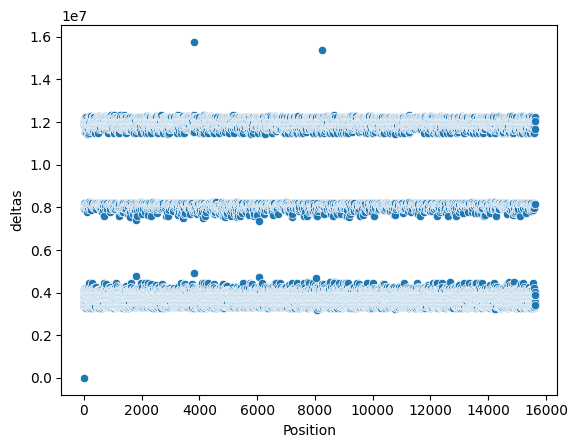

In [92]:
sns.scatterplot(data=df, y='deltas', x=df['Position'])

In [20]:
sns.scatterplot(data=df[df['# delta timestamp (device) [us]']<10000], y='# delta timestamp (device) [us]', x=df['Position'])

KeyError: '# delta timestamp (device) [us]'

In [40]:
df['# delta timestamp (device) [us]'].describe()

count     5850.000000
mean      9995.403248
std        187.028159
min       9263.000000
25%       9898.000000
50%       9998.000000
75%      10096.000000
max      10611.000000
Name: # delta timestamp (device) [us], dtype: float64